Note: I am Using Scipy v1.1.0. In case of any errors you can install scipy 1.1.0 by the following command:
pip install scipy==1.1.0

In [14]:
import scipy
scipy.__version__

'1.1.0'

To download images Click on this url: https://drive.google.com/drive/folders/1pcaTwofZGfoCxZ3Hv2X6vW6xf_1i88eb?usp=sharing

# Import Libraries

In [1]:
import numpy as np
from scipy.misc import imread, imresize
from scipy import ndimage
import matplotlib.pyplot as plt
from scipy import signal
from skimage.color import rgb2gray


# Reading Image

In [2]:
greyscale_image =imread('camera.png',False, 'L')    #read image as grey scale image 
greyscale_image =greyscale_image.astype(np.int32)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


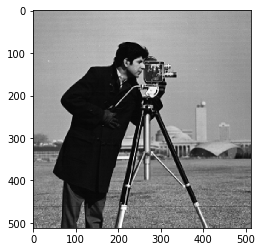

In [3]:
plt.imshow(greyscale_image,plt.cm.gray)

# 1. Identity Mask

In [4]:
id_mask = np.zeros((3,3),dtype=np.int32)
index=int(id_mask.size/2)+1
row=int(index/id_mask.shape[0])
col=int(index/id_mask.shape[1])
#print(row,col)
id_mask[row,col]=1
print(id_mask)

[[0 0 0]
 [0 1 0]
 [0 0 0]]


In [5]:
identity_mask=ndimage.convolve(greyscale_image.copy(), id_mask, mode='constant', cval=0.0)

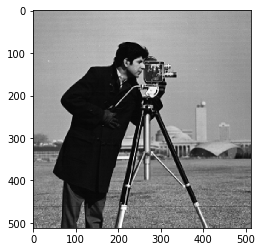

In [6]:
plt.imshow(identity_mask,plt.cm.gray)

# 2. Sharp Mask

In [7]:
sharp_mask= np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])
print(sharp_mask)

[[ 0 -1  0]
 [-1  4 -1]
 [ 0 -1  0]]


In [8]:
sharp_mask=ndimage.convolve(greyscale_image.copy(), sharp_mask, mode='constant', cval=0.0)

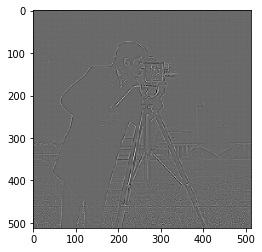

In [9]:
plt.imshow(sharp_mask,plt.cm.gray)

# 3. Gaussian Mask

In [10]:
gm = np.array([[1/16,2/16,1/16],[2/16,4/16,2/16],[1/16,2/16,1/16]])
print(gm)

[[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]


In [11]:
gm_mask=ndimage.convolve(greyscale_image.copy(), gm, mode='constant', cval=0.0)

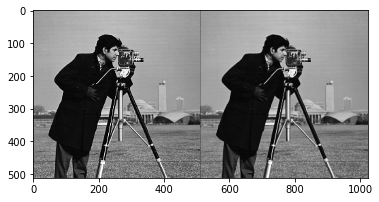

In [12]:
a=np.hstack((greyscale_image.copy(),gm_mask))
plt.imshow(a,plt.cm.gray)

# 4. Enhancement Filter

In [13]:
ef= np.full((3,3),-1)
ef[1,1]=9
print(ef)

[[-1 -1 -1]
 [-1  9 -1]
 [-1 -1 -1]]


In [14]:
ef_mask=ndimage.convolve(greyscale_image.copy(),ef, mode='constant', cval=0.0)

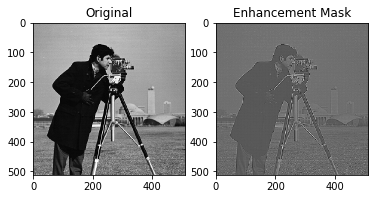

In [18]:

fig, axes = plt.subplots(1, 2)
ax = axes.ravel()

ax[0].imshow(greyscale_image,cmap=plt.cm.gray)
ax[0].set_title("Original")
ax[1].imshow(ef_mask, cmap=plt.cm.gray)
ax[1].set_title("Enhancement Mask")
plt.imshow(ef_mask,cmap=plt.cm.gray) 
plt.show()

# 5. gradient filter prewitt

In [25]:
from skimage import data
from skimage import filters

In [26]:
camera = data.camera() # data you can choose your own data too

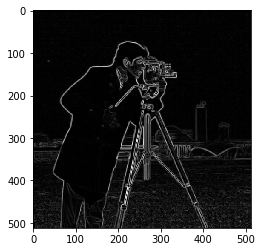

In [27]:
edges = filters.prewitt(camera)
plt.imshow(edges,cmap=plt.cm.gray)  

# 6. gradient filter Sobel

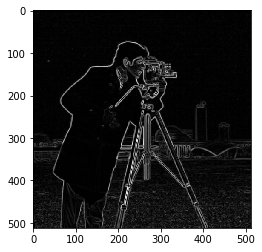

In [28]:
edges = filters.sobel(camera)
plt.imshow(edges,cmap=plt.cm.gray) 

# 7. Laplace

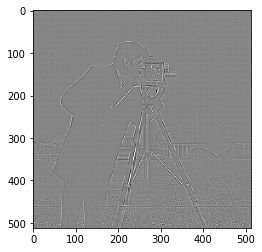

In [29]:
edges = filters.laplace(camera)
plt.imshow(edges,cmap=plt.cm.gray) 